1. analysing stocks related to few companies 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
import pandas_datareader

In [4]:
import datetime

In [4]:
import pandas_datareader.data as web

In [5]:
start=datetime.datetime(2012,1,1)
end=datetime.datetime(2017,1,1)

In [6]:
tesla = pd.read_csv('Tesla_Stock.csv',index_col='Date',parse_dates=True)

In [7]:
tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951


In [9]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [8]:
tesla['Date']=pd.to_datetime(tesla['Date']) ###since date has been converted to index col, it cannot convert any longer to datetime

KeyError: 'Date'

In [10]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [11]:
ford=pd.read_csv('Ford_Stock.csv',index_col='Date',parse_dates=True)

In [12]:
ford.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-03-01,11.00,11.25,10.99,11.13,45709811
2012-04-01,11.15,11.53,11.07,11.30,79725188
2012-05-01,11.33,11.63,11.24,11.59,67877467
2012-06-01,11.74,11.80,11.52,11.71,59840605
2012-09-01,11.83,11.95,11.70,11.80,53981467


In [14]:
gm=pd.read_csv('GM_Stock.csv',index_col='Date',parse_dates=True)

In [15]:
gm.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-03-01,20.83,21.18,20.75,21.05,9321420
2012-04-01,21.05,21.37,20.75,21.15,7856752
2012-05-01,21.10,22.29,20.96,22.17,17884040
2012-06-01,22.26,23.03,22.24,22.92,18234608
2012-09-01,23.20,23.43,22.70,22.84,12091714


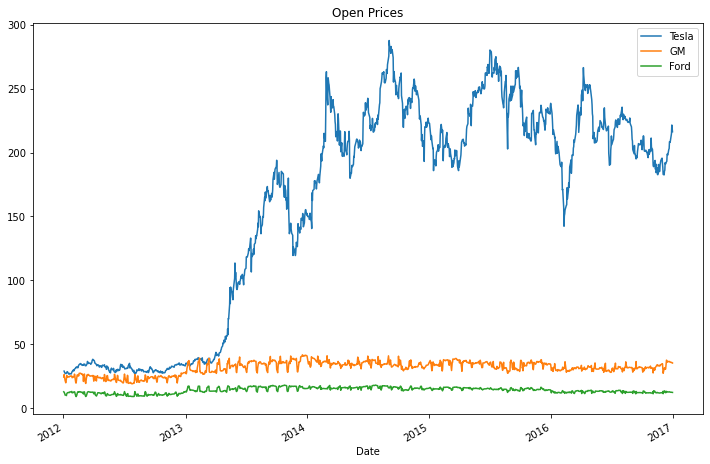

In [16]:
tesla['Open'].plot(label='Tesla',figsize=(12,8),title='Open Prices')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend();

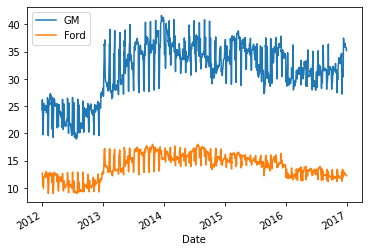

In [17]:
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend();

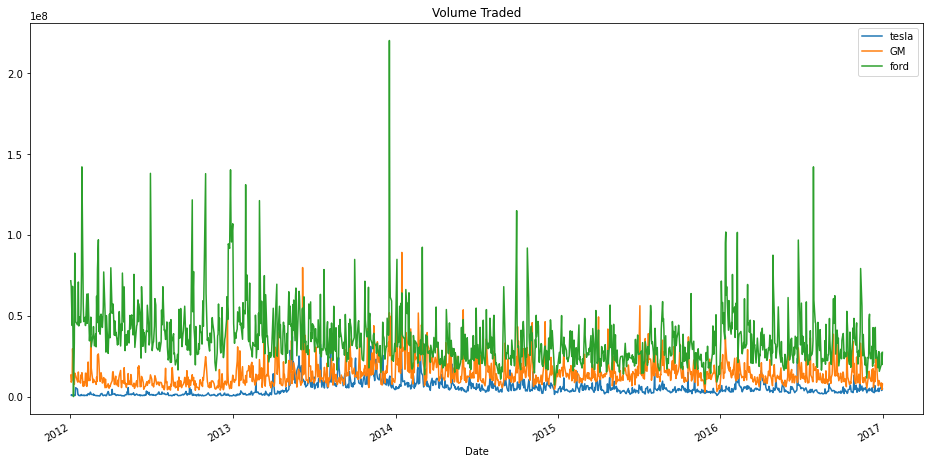

In [18]:
tesla['Volume'].plot(label='tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='ford')
plt.legend();

In [22]:
### when was max volume traded of ford 
ford['Volume'].argmax() ##i need the date here

493

<AxesSubplot:xlabel='Date'>

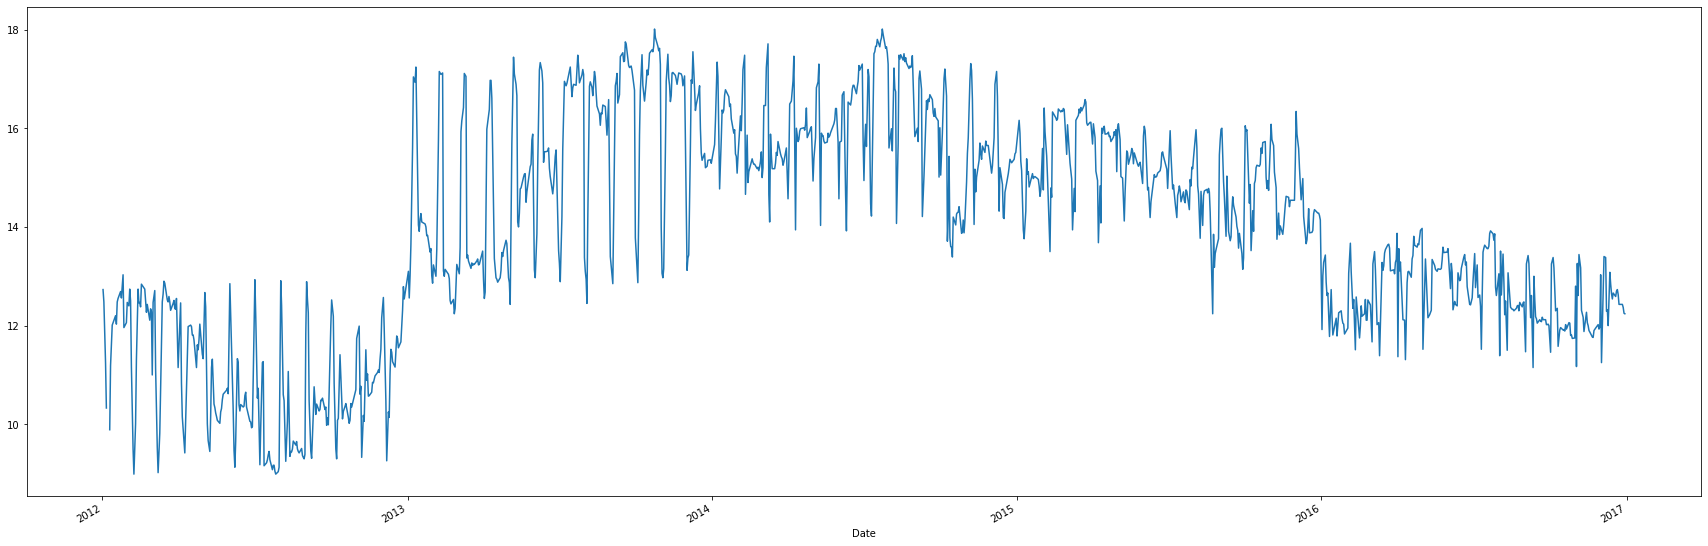

In [25]:
ford['Open'].plot(figsize=(30,10))

In [26]:
### total traded =open price * volume traded
tesla['Total Traded']=tesla['Open']*tesla['Volume']
ford['Total Traded']=ford['Open']*ford['Volume']
gm['Total Traded']=gm['Open']*gm['Volume']

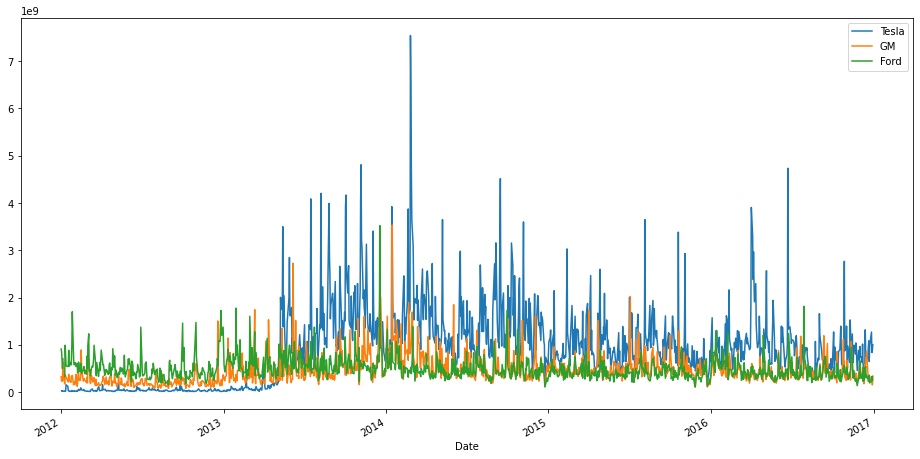

In [27]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend();

In [28]:
tesla['Total Traded'].argmax()

538

<AxesSubplot:xlabel='Date'>

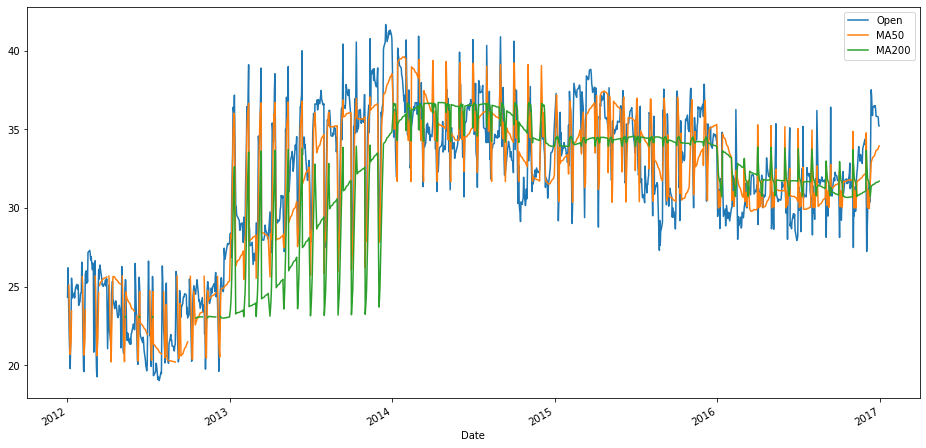

In [29]:
gm['MA50']=gm['Open'].rolling(50).mean()
gm['MA200']=gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(figsize=(16,8))

In [30]:
from pandas.plotting import scatter_matrix

In [33]:
car_comp=pd.concat([tesla["Open"],gm["Open"],ford["Open"]],axis=1)

In [34]:
car_comp.head()

,Open,Open,Open
Date,,,
2012-01-02,NaN,24.33,12.73
2012-01-03,28.94,26.19,12.48
2012-01-04,28.21,NaN,NaN
2012-01-05,27.76,23.04,11.25
2012-01-06,27.20,21.65,10.33


In [36]:
car_comp.columns=['Tesla Open','GM Open','Ford Open']

In [37]:
car_comp.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2012-01-02,NaN,24.33,12.73
2012-01-03,28.94,26.19,12.48
2012-01-04,28.21,NaN,NaN
2012-01-05,27.76,23.04,11.25
2012-01-06,27.20,21.65,10.33


array([[<AxesSubplot:xlabel='Tesla Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Tesla Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='GM Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Ford Open'>]],
      dtype=object)

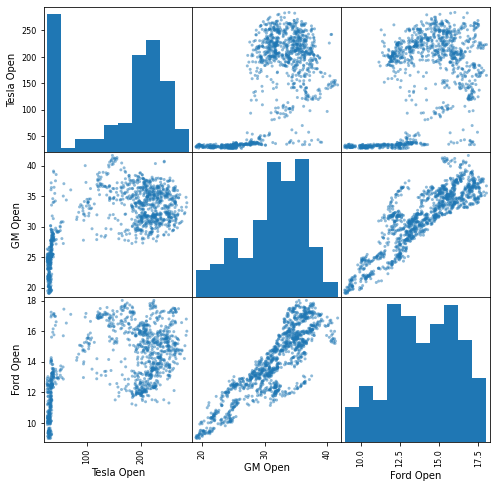

In [38]:
scatter_matrix(car_comp,figsize=(8,8)) ##tesla has a diff kind of growth as compred o gm and ford

array([[<AxesSubplot:xlabel='Tesla Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Tesla Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='GM Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Ford Open'>]],
      dtype=object)

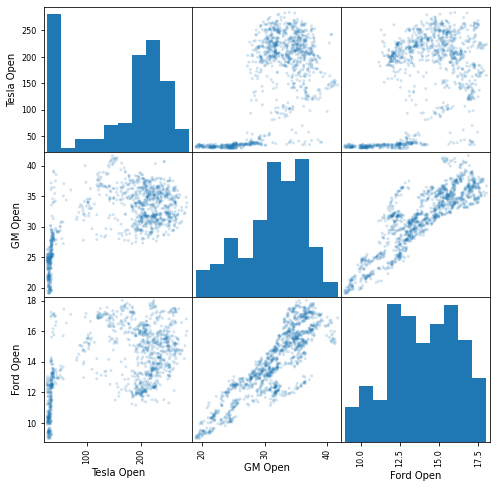

In [39]:
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2) ##darker at pts stacked at top of each other

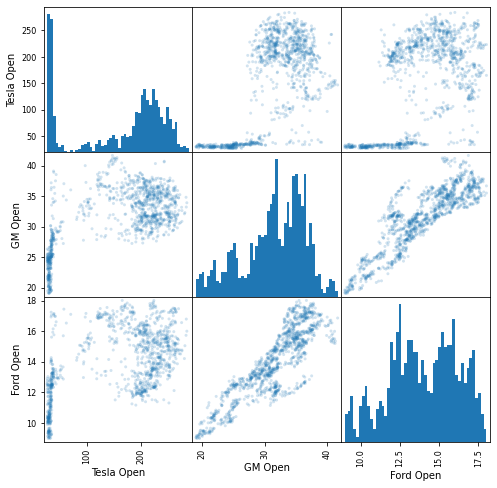

In [40]:
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

### Bonus Visualisation task

In [42]:
from matplotlib.finance import candlestick_ohlc ##open,high,low,close 
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator,MONDAY

ModuleNotFoundError: No module named 'matplotlib.finance'

### Daily Percentage Change

In [43]:
tesla['returns']=(tesla['Close']/tesla['Close'].shift(1))-1

In [47]:
tesla['returns']

Date
2012-01-03         NaN
2012-01-04   -0.013177
2012-01-05   -0.021292
2012-01-06   -0.008481
2012-01-09    0.013388
                ...   
2016-12-23    0.023459
2016-12-27    0.029015
2016-12-28    0.000957
2016-12-29   -0.023027
2016-12-30   -0.004612
Name: returns, Length: 1258, dtype: float64

In [44]:
tesla['Close']

Date
2012-01-03     28.08
2012-01-04     27.71
2012-01-05     27.12
2012-01-06     26.89
2012-01-09     27.25
               ...  
2016-12-23    213.34
2016-12-27    219.53
2016-12-28    219.74
2016-12-29    214.68
2016-12-30    213.69
Name: Close, Length: 1258, dtype: float64

In [45]:
tesla['Close'].shift(1)

Date
2012-01-03       NaN
2012-01-04     28.08
2012-01-05     27.71
2012-01-06     27.12
2012-01-09     26.89
               ...  
2016-12-23    208.45
2016-12-27    213.34
2016-12-28    219.53
2016-12-29    219.74
2016-12-30    214.68
Name: Close, Length: 1258, dtype: float64

In [46]:
tesla['returns']=tesla['Close'].pct_change(1)
tesla['returns']

Date
2012-01-03         NaN
2012-01-04   -0.013177
2012-01-05   -0.021292
2012-01-06   -0.008481
2012-01-09    0.013388
                ...   
2016-12-23    0.023459
2016-12-27    0.029015
2016-12-28    0.000957
2016-12-29   -0.023027
2016-12-30   -0.004612
Name: returns, Length: 1258, dtype: float64

In [48]:
ford['returns']=ford['Close'].pct_change(1)
gm['returns']=gm['Close'].pct_change(1)

In [49]:
ford.head()

,Open,High,Low,Close,Volume,Total Traded,returns
Date,,,,,,,
2012-03-01,11.00,11.25,10.99,11.13,45709811,5.028079e+08,NaN
2012-04-01,11.15,11.53,11.07,11.30,79725188,8.889358e+08,0.015274
2012-05-01,11.33,11.63,11.24,11.59,67877467,7.690517e+08,0.025664
2012-06-01,11.74,11.80,11.52,11.71,59840605,7.025287e+08,0.010354
2012-09-01,11.83,11.95,11.70,11.80,53981467,6.386008e+08,0.007686


<AxesSubplot:>

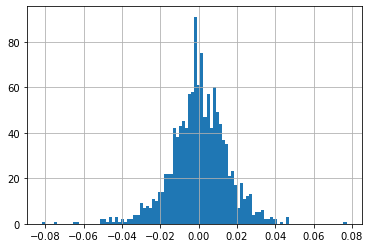

In [50]:
ford['returns'].hist(bins=100)

<AxesSubplot:>

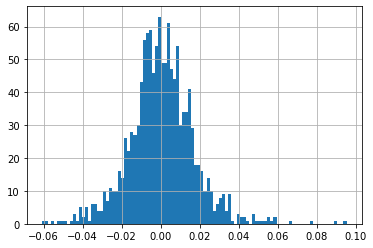

In [51]:
gm['returns'].hist(bins=100)

<AxesSubplot:>

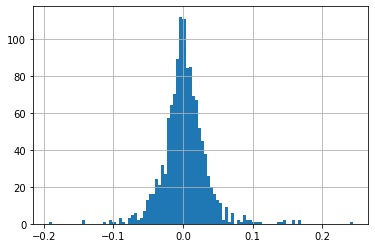

In [52]:
tesla['returns'].hist(bins=100) ##histograms are overlapping each other as seen thry x axis

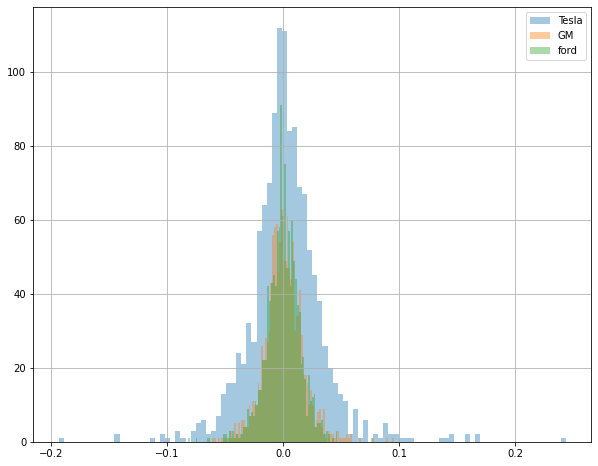

In [55]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.4)
gm['returns'].hist(bins=100,label='GM',figsize=(10,8),alpha=0.4)
ford['returns'].hist(bins=100,label='ford',figsize=(10,8),alpha=0.4)
plt.legend()

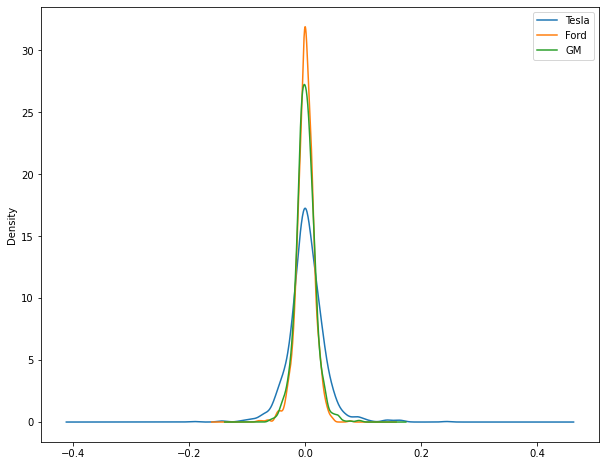

In [56]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(10,8))
ford['returns'].plot(kind='kde',label='Ford',figsize=(10,8))
gm['returns'].plot(kind='kde',label='GM',figsize=(10,8))
plt.legend();

##Ford is stable


<ipython-input-58-fffc3974f191>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  box_df.column=['Tesla_Ret','Ford_Ret','GM_Ret']


<AxesSubplot:>

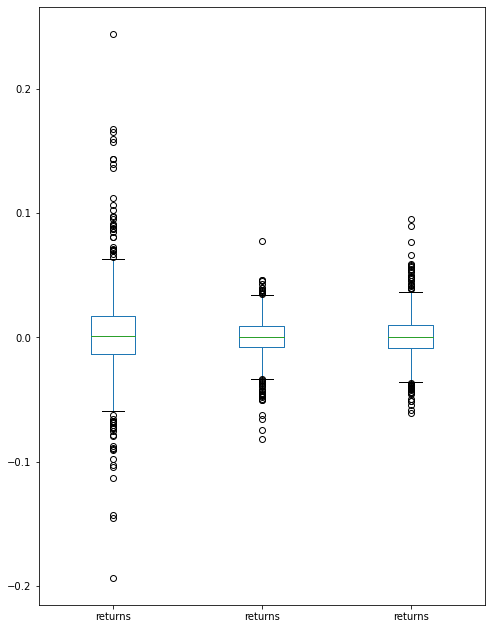

In [58]:
box_df=pd.concat([tesla['returns'],ford['returns'],gm['returns']],axis=1)
box_df.column=['Tesla_Ret','Ford_Ret','GM_Ret']
box_df.plot(kind='box',figsize=(8,11)) ##

array([[<AxesSubplot:xlabel='returns', ylabel='returns'>,
        <AxesSubplot:xlabel='returns', ylabel='returns'>,
        <AxesSubplot:xlabel='returns', ylabel='returns'>],
       [<AxesSubplot:xlabel='returns', ylabel='returns'>,
        <AxesSubplot:xlabel='returns', ylabel='returns'>,
        <AxesSubplot:xlabel='returns', ylabel='returns'>],
       [<AxesSubplot:xlabel='returns', ylabel='returns'>,
        <AxesSubplot:xlabel='returns', ylabel='returns'>,
        <AxesSubplot:xlabel='returns', ylabel='returns'>]], dtype=object)

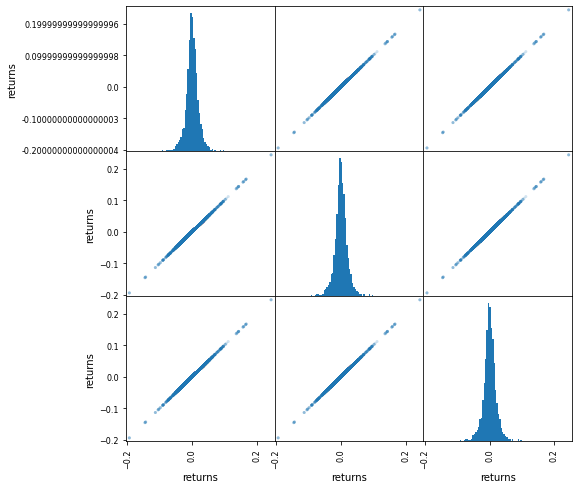

In [59]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':100}) ###daily returns

KeyError: "None of [Float64Index([                   nan,   0.015274034141958603,\n                0.025663716814159132,   0.010353753235547991,\n               0.0076857386848847575,                    0.0,\n                0.022881355932203418,  0.0057995028997515075,\n               -0.008237232289950658, -0.0016611295681062677,\n              ...\n                0.003974562798092274,   0.002375296912114022,\n                0.009478672985781866,  -0.010954616588419341,\n                -0.01898734177215189,   0.004838709677419395,\n               -0.005617977528089901,  -0.011299435028248594,\n              -0.0016326530612245094,   -0.00817661488143906],\n             dtype='float64', length=1258)] are in the [columns]"

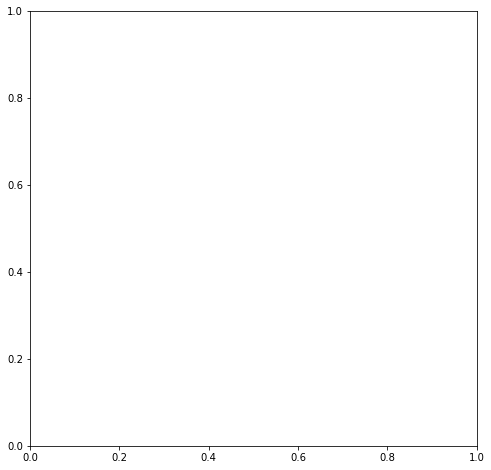

In [63]:
box_df.plot(kind='scatter',x=ford['returns'],y=gm['returns'],alpha=0.5,figsize=(8,8))

### Cummulative Daily Returns
1. % daily return

In [64]:
tesla['Cumulative Return']=(1+tesla['returns']).cumprod()

In [65]:
tesla

,Open,High,Low,Close,Volume,Total Traded,returns,Cumulative Return
Date,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,2.685782e+07,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,1.777332e+07,-0.013177,0.986823
2012-01-05,27.76,27.93,26.85,27.12,1005432,2.791079e+07,-0.021292,0.965812
2012-01-06,27.20,27.79,26.41,26.89,687081,1.868860e+07,-0.008481,0.957621
2012-01-09,27.00,27.49,26.12,27.25,896951,2.421768e+07,0.013388,0.970442
...,...,...,...,...,...,...,...,...
2016-12-23,208.00,213.45,207.71,213.34,4670464,9.714565e+08,0.023459,7.597578
2016-12-27,214.88,222.25,214.42,219.53,5915732,1.271172e+09,0.029015,7.818020
2016-12-28,221.53,223.80,217.20,219.74,3782456,8.379275e+08,0.000957,7.825499


In [66]:
ford['Cumulative Return']=(1+ford['returns']).cumprod()
gm['Cumulative Return']=(1+gm['returns']).cumprod()

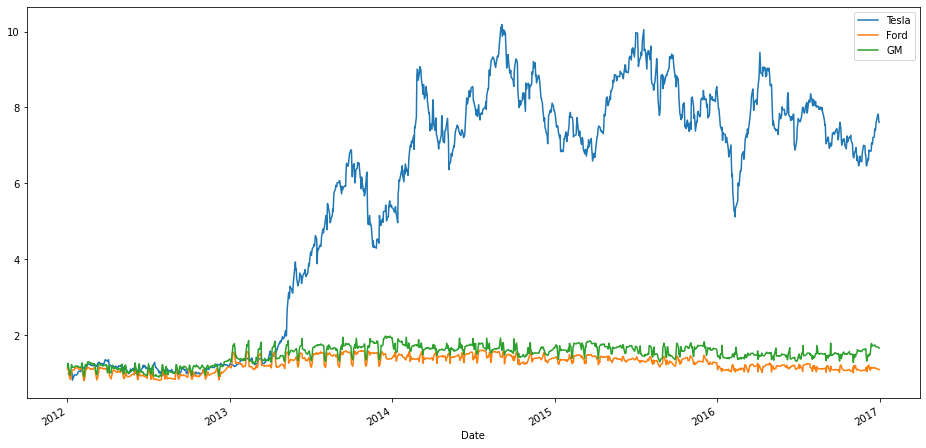

In [67]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8))
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()